## How ML algo works to train/build a model

## Linear Regression --> ML Algo--> Supervised , Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("data/bp-age.csv")

In [5]:
df

,bp,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


## predict 'bp' given 'age' 
## 'bp' is value -> Supervised , 'bp' is continuous column:-> regression
## need to build / train a model , which can predict 'bp' given 'age'
## one independent variable : Single Linear Regresssion(SLR)

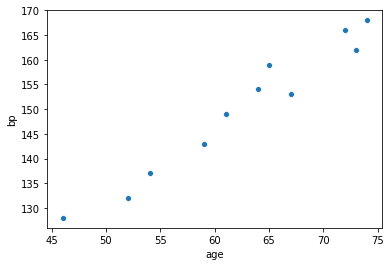

In [9]:
sns.scatterplot(x='age', y='bp', data=df)

In [10]:
df[:4]

,bp,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211


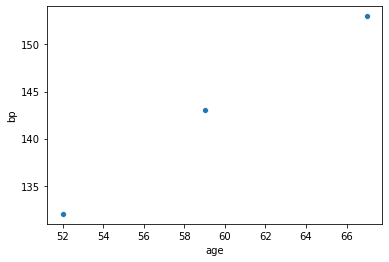

In [11]:
sns.scatterplot(x='age', y='bp', data=df[:3])

In [12]:
df[:3]

,bp,age,weight
0,132,52,173
1,143,59,184
2,153,67,194


## Gradient Decent 

In [13]:
df

,bp,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


In [14]:
x=df['age'].values
y=df['bp'].values

In [15]:
np.random.seed(20)
arr=np.random.rand(2)
c0=arr[0]
c1=arr[1]
n=df.shape[0]  #total records
learning_rate=0.01  # 1%

In [16]:
c0

0.5881308010772742

In [17]:
c1

0.897713727909418

In [18]:
dc0 = (-2/n)*np.sum(y-c0-c1*x)   # dj/dc0, involves entire records

In [19]:
dc0

-186.87295092988725

In [20]:
dc1=(-2/n)*np.sum(x*(y-c0-c1*x))    # involves all records

In [21]:
dc1

-11756.48160401558

In [22]:
x

array([52, 59, 67, 73, 64, 74, 54, 61, 65, 46, 72], dtype=int64)

In [23]:
meanx=x.mean()

In [24]:
meanx   # center of all values

62.45454545454545

In [25]:
x-meanx

array([-10.45454545,  -3.45454545,   4.54545455,  10.54545455,
         1.54545455,  11.54545455,  -8.45454545,  -1.45454545,
         2.54545455, -16.45454545,   9.54545455])

In [26]:
sd=x.std()

In [27]:
sd

8.690262433150382

In [29]:
x1=(x-x.mean())/x.std()   # transforming va;ues with loosing factual meaning
# rescaling (with objective of reducing magnitude)

In [30]:
x

array([52, 59, 67, 73, 64, 74, 54, 61, 65, 46, 72], dtype=int64)

In [31]:
x-meanx

array([-10.45454545,  -3.45454545,   4.54545455,  10.54545455,
         1.54545455,  11.54545455,  -8.45454545,  -1.45454545,
         2.54545455, -16.45454545,   9.54545455])

In [33]:
# involves all records
dc0=(-2/n)*np.sum(y-c0-c1*x1)
dc1=(-2/n)*np.sum(x1*(y-c0-c1*x1))

In [34]:
dc0

-299.0055565796636

In [35]:
dc1

-23.636286046841242

In [36]:
c0

0.5881308010772742

In [37]:
c1

0.897713727909418

In [38]:
c0=c0-learning_rate*dc0
c1=c1-learning_rate*dc1

In [39]:
c0

3.5781863668739105

In [40]:
c1

1.1340765883778303

In [41]:
np.sqrt(np.mean((y-(c0+c1*x)) ** 2)) # 75.7854

75.78548830213494

In [42]:
# INVOLVES ALL RECORDS 
dc0=(-2/n)*np.sum(y-c0-c1*x1)
dc1=(-2/n)*np.sum( x1*(y-c0-c1*x1 ))

In [43]:
c0=c0-learning_rate*dc0
c1=c1-learning_rate*dc1

In [44]:
c0

6.508440821354614

In [45]:
c1

1.3657121916368746

In [46]:
np.sqrt(np.mean((y-(c0+c1*x)) ** 2)) # 58.35

58.35470611318529

In [47]:
np.random.seed(20)
def learn(x,y,lr=.01,nepochs=1000): #nepochs=number of epochs,lr=learning rate
    arr=np.random.rand(2)
    c0=arr[0]
    c1=arr[1]
    n=df.shape[0] # total records
    for epoch in range(nepochs):
        dc0=(-2/n)*np.sum(y-c0-c1*x) # dj/dc0
        dc1=(-2/n)*np.sum( x*(y-c0-c1*x ))  #dj/dc1
        c0=c0-lr*dc0
        c1=c1-lr*dc1
    #tup=c0,c1
    return c0,c1


In [48]:
x=df['age'].values
y=df['bp'].values

In [49]:
x1=(x-x.mean())/x.std() # transforming (scale/unit changed) : standard scaling 

In [50]:
t=learn(x1,y)

In [51]:
t

(150.0909088393008, 12.715856731440477)

In [52]:
t=learn(x1,y,nepochs=10)

In [53]:
t

(28.184154227254776, 2.9926746010886864)

In [54]:
np.random.seed(20)
def learn(x,y,lr=.01,nepochs=1000): #nepochs=number of epochs,lr=learning rate
    arr=np.random.rand(2)
    c0=arr[0]
    c1=arr[1]
    n=df.shape[0] # total records
    errordf=pd.DataFrame(columns=["c0","c1","error"])
    predicted=c0+c1*x
    error=np.sqrt( np.mean(  (y-predicted)**2 ) )
    errordf.loc[0]=[c0,c1,error]
    for epoch in range(nepochs):
        dc0=(-2/n)*np.sum(y-c0-c1*x) # dj/dc0
        dc1=(-2/n)*np.sum( x*(y-c0-c1*x ))  #dj/dc1
        c0=c0-lr*dc0
        c1=c1-lr*dc1
        predicted=c0+c1*x
        error=np.sqrt( np.mean(  (y-predicted)**2 ) )
        errordf.loc[epoch+1]=[c0,c1,error]
    #tup=c0,c1
    return c0,c1,errordf


In [55]:
x=df['age'].values
y=df['bp'].values

In [56]:
x1=(x-x.mean())/x.std() 

In [57]:
c0,c1,df=learn(x1,y)

In [58]:
df

,c0,c1,error
0,0.588131,0.897714,149.992887
1,3.578186,1.134077,146.993988
2,6.508441,1.365712,144.055086
3,9.380090,1.592715,141.174983
4,12.194307,1.815178,138.352502
...,...,...,...
996,150.090909,12.715857,2.667753
997,150.090909,12.715857,2.667753
998,150.090909,12.715857,2.667753
999,150.090909,12.715857,2.667753


In [59]:
df[:-10]

,c0,c1,error
0,0.588131,0.897714,149.992887
1,3.578186,1.134077,146.993988
2,6.508441,1.365712,144.055086
3,9.380090,1.592715,141.174983
4,12.194307,1.815178,138.352502
...,...,...,...
986,150.090909,12.715857,2.667753
987,150.090909,12.715857,2.667753
988,150.090909,12.715857,2.667753
989,150.090909,12.715857,2.667753


In [60]:
df[-10:]

,c0,c1,error
991,150.090909,12.715857,2.667753
992,150.090909,12.715857,2.667753
993,150.090909,12.715857,2.667753
994,150.090909,12.715857,2.667753
995,150.090909,12.715857,2.667753
996,150.090909,12.715857,2.667753
997,150.090909,12.715857,2.667753
998,150.090909,12.715857,2.667753
999,150.090909,12.715857,2.667753
1000,150.090909,12.715857,2.667753


In [61]:
df.shape

(1001, 3)

In [62]:
df[500:511]

,c0,c1,error
500,150.084776,12.715372,2.667760
501,150.084899,12.715382,2.667760
502,150.085019,12.715391,2.667759
503,150.085137,12.715400,2.667759
504,150.085252,12.715410,2.667759
505,150.085365,12.715419,2.667758
506,150.085476,12.715427,2.667758
507,150.085585,12.715436,2.667758
508,150.085691,12.715444,2.667758
509,150.085796,12.715453,2.667758


In [63]:
class LinReg:
    def __init__(self,lr=.01,nepochs=1000,sd=20):
        self.lr=lr
        self.nepochs=nepochs
        np.random.seed(sd)
        arr=np.random.rand(2)
        self.c0=arr[0]
        self.c1=arr[1]
    def fit(self,x,y):
        n=x.shape[0] # total records
        for epoch in range(self.nepochs):
            dc0=(-2/n)*np.sum(y-self.c0-self.c1*x) # dj/dc0
            dc1=(-2/n)*np.sum( x*(y-self.c0-self.c1*x ))  #dj/dc1
            self.c0=self.c0-self.lr*dc0
            self.c1=self.c1-self.lr*dc1
    def predict(self,x):
        return self.c0+self.c1*x
        

In [64]:
model=LinReg()

In [65]:
model.fit(x1,y)

In [66]:
model.c0

150.0909088393008

In [67]:
model.c1

12.715856731440477

In [68]:
150.09+12.71*x1

array([134.79963636, 145.03753201, 156.73798419, 165.51332332,
       152.35031462, 166.97587985, 137.7247494 , 147.96264506,
       153.81287115, 126.02429723, 164.0507668 ])

In [69]:
x1

array([-1.20301838, -0.39751912,  0.52305147,  1.21347941,  0.1778375 ,
        1.32855074, -0.97287574, -0.16737647,  0.29290882, -1.89344632,
        1.09840809])

In [70]:
pred=model.predict(x1)

In [71]:
np.mean((y-pred)**2)  #MSe

7.116904435026635

In [72]:
np.sqrt(np.mean((y-pred)**2))  # ROOT of MSE == RMSE

2.6677526937530462